<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>"Глубокое обучение". Продвинутый поток</b></h3>

<h1 style="text-align: center;"><b>Семинар 5. Оптимизация в машинном обучении</b></h1>

Сегодня мы поработаем с оптимизацией в линейных алгоритмах (линейная регрессия и логистическая регрессия), попутно потренировавшись ООП в Python.

In [0]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
import scipy.linalg as sla
import matplotlib.pyplot as plt
%matplotlib inline

# Линейная регрессия

Линейные методы предполагают, что между признаками объекта и целевой переменной существует линейная зависимость, то есть
$$y = w_1 x_1 + w_2 x_2 + ... + w_k x_k + b, $$ где $у$ --- целевая переменная (что мы хотим предсказать), $x_i$ --- признак объекта $х$, $w_i$ --- вес $i$-го признака, $b$ --- bias (смещение, свободный член)

Часто предполагают, что объект $х$ содержит в себе фиктивный признак, который всегда равен 1, тогда bias это есть вес этого признака. В этом случае формула принимает простой вид:
$$y = \langle w, x \rangle,$$
где $\langle \cdot, \cdot \rangle$ -- скалярное произведение векторов.

В матричной форме, в случае, когда у нас есть n объектов формулу можно переписать следующим образом:$$ Y = Xw, $$ где $Y$ -- вектор размера $n$, $X$ --- матрица объекты-признаки размера $n \times k$, $w$ -- вектор весов размера $k$.

Решение по методу наименьших квадратов дает $$ w = (X^TX)^{-1}X^TY $$

Реализуем класс линейной регрессии с помощью этой формулы.

In [0]:
class MyLinearRegression:
    
    def __init__(self):
        pass
    
    def fit(self, X, y):
        # Принимает на вход X, y и вычисляет веса по данной выборке
        # Не забудьте про фиктивный признак равный 1!
        
        n, k = X.shape
        X_train = np.hstack((X, np.ones((n, 1))))
        
        self.w = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y
        
    def predict(self, X):
        # Принимает на вход X и возвращает ответы модели
        
        n, k = X.shape
        X_test = np.hstack((X, np.ones((n, 1))))
        y_pred = X_test @ self.w
        return y_pred
    
    def get_weights(self):
        return self.w

### Тестирование
Сгенерируем искусственные данные для теста нашей модели

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = np.linspace(-5, 5, 100)
y = 10 * X - 7 + np.random.randn(100) * 10



X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

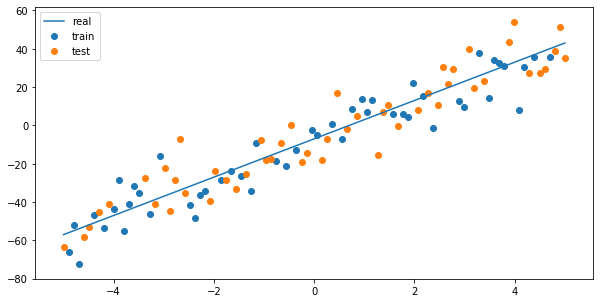

In [5]:
plt.figure(figsize=(10, 5))
plt.plot(X, 10 * X - 7, label='real')
plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.legend()
plt.show()

Обучим модель на трейне и предскажем результаты на тесте

In [0]:
regressor = MyLinearRegression()

# Ваш код здесь

regressor.fit(X_train[:, np.newaxis], y_train)

predictions = regressor.predict(X_test[:, np.newaxis])
w = regressor.get_weights()

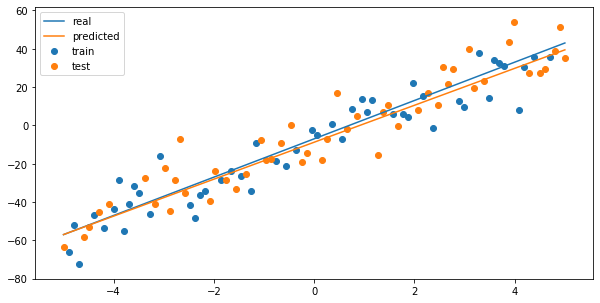

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(X, 10 * X - 7, label='real')

plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X, X * w[0] + w[-1], label='predicted')
plt.legend()
plt.show()

### Результаты

In [8]:
from sklearn.metrics import mean_squared_error

train_predictions = regressor.predict(X_train[:, np.newaxis])
test_predictions = regressor.predict(X_test[:, np.newaxis])

print('Train MSE: ', mean_squared_error(y_train, train_predictions))
print('Test MSE: ', mean_squared_error(y_test, test_predictions))

Train MSE:  89.9278386659052
Test MSE:  100.7125962600699


## Градиентная оптимизация
Как уже было упомянуто на лекции, обращение матрицы --- очень долгая операция. Кроме того, обратная матрица не всегда существует. По этим причинам, мы воспользуемся методом градиентного спуска для оптимизации эмпирического риска.

Как правило, вместо градиентного спуска используют стохастический градиентный спуск: выбирают случайный элемент обучающей выборки и изменяют коэффициенты модели по направлению антиградиента функции потерь на этом примере.

Реализуйте новый класс линейной регрессии, в которой проведите оптимизацию методом стохастического градиентного спуска. Используйте наследование классов.

In [0]:
class MyGradientLinearRegression(MyLinearRegression):
    def __init__(self):
        super().__init__() #в данном случае ничего не делает
        self.w = None
    
    def fit(self, X, y, lr=0.01, n_epoch=10):
        # Принимает на вход X, y и вычисляет веса по данной выборке
        # Не забудьте про фиктивный признак равный 1!
        
        n, k = X.shape
        
        if self.w is None:
            self.w = np.random.randn(k + 1)
        
        X_train = np.hstack((X, np.ones((n, 1))))
        
        losses = []
        
        for iter_num in range(n_epoch):
            y_pred = self.predict(X)
            losses.append(mean_squared_error(y_pred, y))

            grad = np.zeros_like(self.w)
            for x, prediction, label in zip(X_train, y_pred, y):
                                
                grad += 2 * (prediction - label) * x
            
            grad /= n
            
            self.w -= lr * grad
            
            
        return losses
        
        

### Тестируем. Поиграйтесь с количеством эпох

In [0]:
regressor = MyGradientLinearRegression()

l = regressor.fit(X_train[:, np.newaxis], y_train, n_epoch=100)

predictions = regressor.predict(X_test[:, np.newaxis])
w = regressor.get_weights()

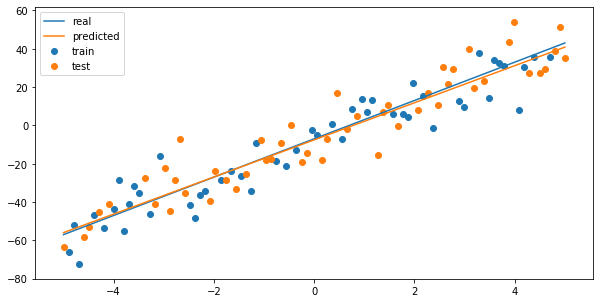

In [11]:
plt.figure(figsize=(10, 5))
plt.plot(X, 10 * X - 7, label='real')

plt.scatter(X_train, y_train, label='train')
plt.scatter(X_test, y_test, label='test')
plt.plot(X, X * w[0] + w[-1], label='predicted')
plt.legend()
plt.show()

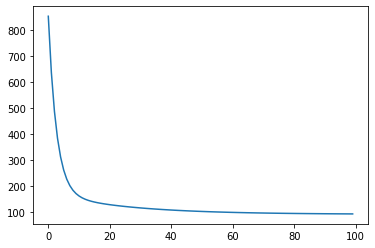

In [12]:
plt.plot(l)

## Что можно делать дальше

* Реализовать стохастический градиентный спуск
* Реализовать Ridge-регрессию (к функции потерь прибавляется слагаемое $C||w||$).

# Логистическая регрессия

In [0]:
def logit(x, w):
    return np.dot(x, w)

def sigmoid(h):
    return 1. / (1 + np.exp(-h))



class MyLogisticRegression(object):
    
    def __init__(self):
        self.w = None
    
    def fit(self, X, y, n_epoch=100, lr=0.1):
        # Принимает на вход X, y и вычисляет веса по данной выборке.
        # Множество допустимых классов: {1, -1}
        # Не забудьте про фиктивный признак равный, 1!
        
        n, k = X.shape
        
        if self.w is None:
            self.w = np.random.randn(k + 1)
        
        X_train = np.concatenate((np.ones((n, 1)), X), axis=1)
        
        losses = []
        
        for iter_num in range(n_epoch):
            
            z = sigmoid(logit(X_train, self.w))
            grad =  np.dot(X_train.T, (z - y)) / len(y)

            self.w -= grad * lr

            losses.append(self.__loss(y, z))
        
        return losses
        
    def predict_proba(self, X):
        # Принимает на вход X и возвращает ответы модели
        n, k = X.shape
        X_ = np.concatenate((np.ones((n, 1)), X), axis=1)
        return sigmoid(logit(X_, self.w))

    def predict(self, X, threshold=0.5):
        return self.predict_proba(X) >= threshold
    
    def get_weights(self):
        return self.w
      
    def __loss(self, y, p):
        p = np.clip(p, 1e-10, 1 - 1e-10)
        return np.mean(y * np.log(p) + (1 - y) * np.log(1 - p))

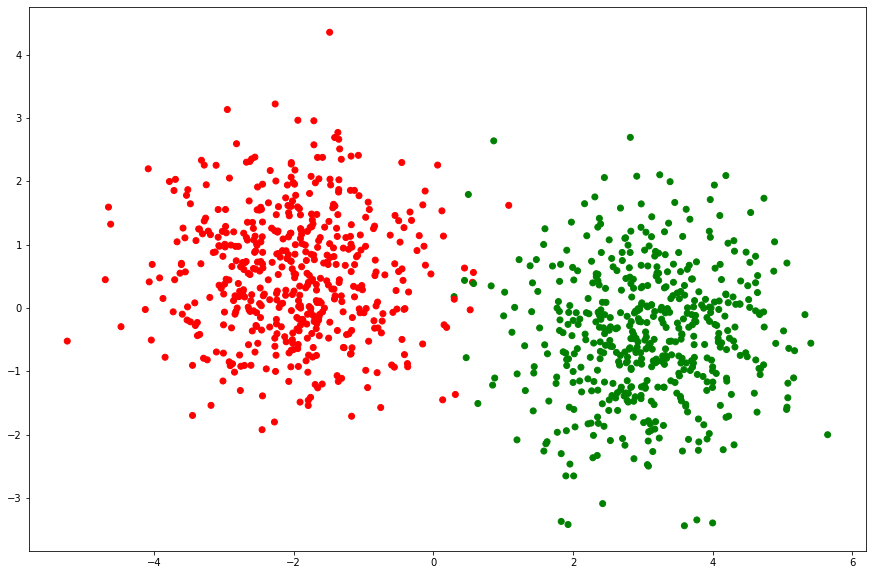

In [16]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=1000, centers=[[-2,0.5],[3,-0.5]], cluster_std=1, random_state=42)

colors = ("red", "green")
colored_y = np.zeros(y.size, dtype=str)

for i, cl in enumerate([0,1]):
    colored_y[y == cl] = str(colors[i])
    
plt.figure(figsize=(15,10))
plt.scatter(X[:, 0], X[:, 1], c=colored_y)
plt.show()

In [0]:
clf = MyLogisticRegression()

clf.fit(X, y, n_epoch=1000)

w = clf.get_weights()

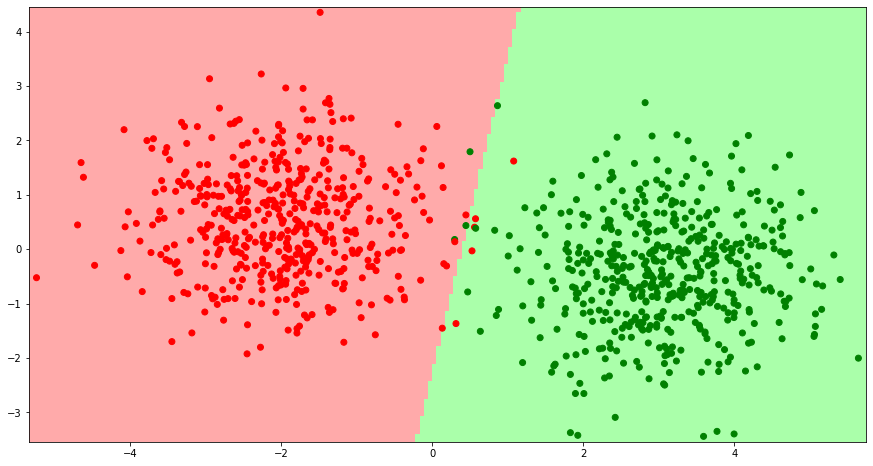

In [18]:
from matplotlib.colors import ListedColormap

plt.figure(figsize=(15,8))

eps = 0.1
xx, yy = np.meshgrid(np.linspace(np.min(X[:,0]) - eps, np.max(X[:,0]) + eps, 200),
                     np.linspace(np.min(X[:,1]) - eps, np.max(X[:,1]) + eps, 200))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)



plt.scatter(X[:, 0], X[:, 1], c=colored_y)